In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/praktikum/praktikum3/"

In [9]:
import pandas as pd

df = pd.read_csv(path + "/data/stunting_wasting_dataset.csv")
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [11]:
df1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
        .rename(columns={"Jenis Kelamin":"jk", "Umur (bulan)":"umur_bln",
                         "Tinggi Badan (cm)":"tinggi_cm", "Berat Badan (kg)": "berat_kg"}).copy())

## Laki-laki: 1, Perempuan : 0
df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})
df1.head()

,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [12]:
# Hitung matriks korelasi
corr_matrix = df1.corr()

# Tampilkan matriks korelasi
print(corr_matrix)

           berat_kg        jk  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


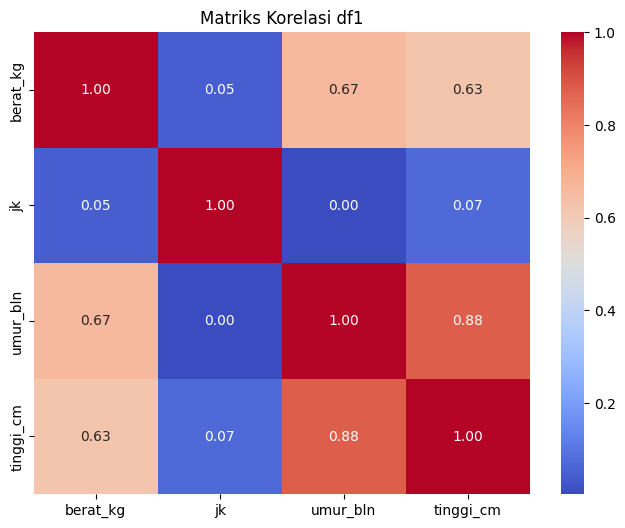

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Buat heatmap grafik
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
# Tampilkan grafik
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

y = df1["berat_kg"]
x = df1[["umur_bln", "tinggi_cm"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("jumlah data train :", len(x_train))
print("jumlah data test :", len(x_test))
print("jumlah data test :", len(y_test))
print("jumlah data test :", len(y_train))
x_train.head()

jumlah data train : 80000
jumlah data test : 20000
jumlah data test : 20000
jumlah data test : 80000


,umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


In [20]:
import statsmodels.api as sm

x_train_const = sm.add_constant(x_train)
x_train_const.head()

,const,umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [37]:
model = sm.OLS(y_train, x_train_const).fit()
print('---------------')
print(model.params)
print('---------------')
const = model.params['const']
x1_umur = model.params['umur_bln']
x2_tinggi = model.params['tinggi_cm']

print(f"y = {const:.3f} + {x1_umur:.3f} * x1 + {x2_tinggi:.3f} * x2")

---------------
const        2.545617
umur_bln     0.229719
tinggi_cm    0.054192
dtype: float64
---------------
y = 2.546 + 0.230 * x1 + 0.054 * x2


In [38]:
import statsmodels.api as sm

# Tambahkan konstanta ke X (intercept)
x_train_sm = sm.add_constant(x_train)

# Buat model regresi
model = sm.OLS(y_train, x_train_sm).fit()

# Tampilkan summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Mon, 06 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:47:53   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

In [43]:
import pandas as pd
import numpy as np

x_train_sm = sm.add_constant(x_train)
y_pred_test = model.predict(x_test_const)

hasil = pd.DataFrame({
    "umur (bulan)": x_test["umur_bln"].to_numpy(),
    "tinggi (cm)": x_test["tinggi_cm"].to_numpy(),
    "berat aktual (kg)": y_test.to_numpy(),
    "berat prediksi (kg)": y_pred_test
})

hasil["selisih error (kg)"] = hasil["berat aktual (kg)"] - hasil["berat prediksi (kg)"]

denom = hasil["berat aktual (kg)"].replace(0, np.nan)

hasil["akurasi (%)"] = (1 - (hasil["selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,umur (bulan),tinggi (cm),berat aktual (kg),berat prediksi (kg),selisih error (kg),akurasi (%)
75721,1,54.6,7.0,5.734226,1.265774,81.917510
80184,8,66.0,12.2,7.960047,4.239953,65.246290
19864,20,90.0,10.9,12.017284,-1.117284,89.749692
76699,13,82.4,9.6,9.997392,-0.397392,95.860500
92991,11,70.1,13.2,8.871391,4.328609,67.207511
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,3.539784,70.001830
29313,15,80.2,9.6,10.337607,-0.737607,92.316595
37862,8,61.9,8.0,7.737860,0.262140,96.723246
53421,12,74.9,5.4,9.361232,-3.961232,26.643845
